In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('airline_pricing_dataset.csv')
data.head()

,days_left,demand,seasonality,competitor_price,base_price,ticket_price
0,7,0.247348,0,130.249366,492.147496,675.504182
1,20,0.450544,1,145.063386,127.001019,286.837213
2,29,0.129159,1,150.193332,307.480398,580.010912
3,15,0.954051,0,270.123212,171.745873,359.612520
4,11,0.606175,0,212.244558,488.270618,803.272337


# Model

In [10]:
X = data[['days_left', 'demand', 'seasonality', 'competitor_price', 'base_price']]
y = data['ticket_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaluation of Model

MAE: 28.91748585703312
MSE: 1166.7997364592306
RMSE: 34.1584504399604
R²: 0.9724551041773094


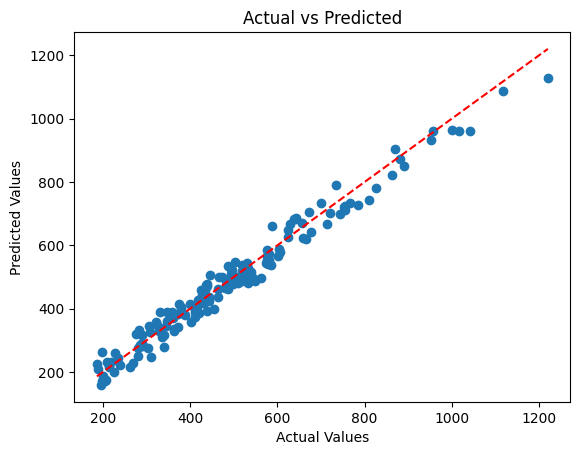

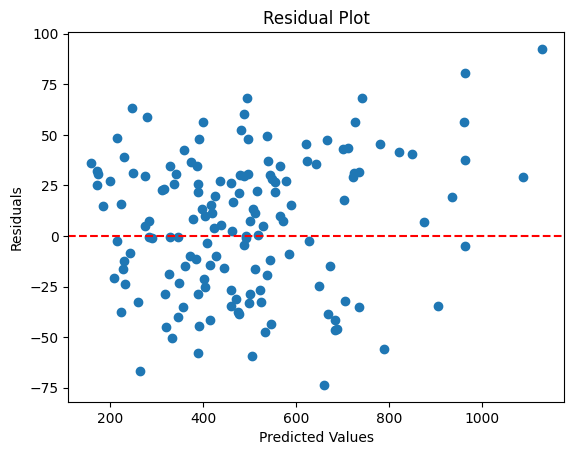

In [19]:
# Make predictions
y_pred = model.predict(X_test)

# Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()






In [11]:

feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                  importance
base_price          0.606544
seasonality         0.201851
demand              0.182828
competitor_price    0.004636
days_left           0.004142


# Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END m

# Changing Model Parameters According to Above result

In [13]:
X = data[['days_left', 'demand', 'seasonality', 'competitor_price', 'base_price']]
y = data['ticket_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
modelupd = RandomForestRegressor(n_estimators=250, random_state=42, max_depth=10,min_samples_leaf=1,min_samples_split=2)
modelupd.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=250, random_state=42)

# Evaluation of Modelupd

MAE: 28.460102947491663
MSE: 1119.196757094481
RMSE: 33.45439817265409
R²: 0.973578878091958


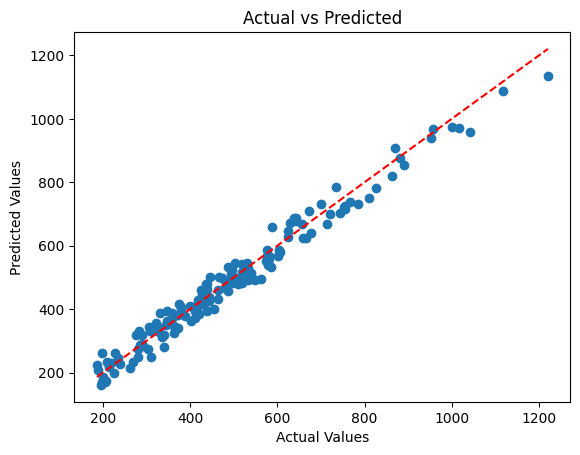

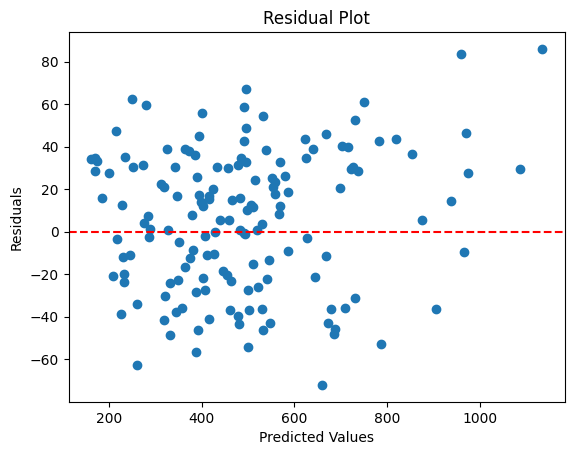

In [18]:
# Make predictions
y_pred = modelupd.predict(X_test)

# Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


